Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
len(df)

7043

## Initial data preparation

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Convert the rows to columns

In [15]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [16]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df.head(6)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
5,9305-cdskc,female,0,no,no,8,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,99.65,820.5,yes


In [18]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

total charges column is a string but ideally it contains integers. Lets fix that

In [19]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

convert the column to integer data type

In [20]:
#df.totalcharges = pd.to_numeric(df.totalcharges)

In [21]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [22]:
df.totalcharges.isnull().sum()

11

In [23]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [24]:
tc = pd.to_numeric(df.totalcharges)

In [25]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [26]:
df.totalcharges = df.totalcharges.fillna(0)

In [27]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

Convert yes or no to 1 or 0

In [28]:
df.churn = (df.churn == 'yes').astype(int)

In [29]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## Setting up Validation Framework

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [34]:
len(df_full_train), len(df_test)

(5634, 1409)

We want to have 0.6 train, 0.2 test and 0.2 val
to find percentage of val split = 20/80 = 1/4 = 0.25
0.25

In [35]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [37]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_train  = df_train.churn.values
y_val  = df_val.churn.values
y_test  = df_test.churn.values

In [40]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## Exploratory data analysis
* checking missing values
* look at the target variable(churn)
* look at numerical and categorica values


In [41]:
df_full_train.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [42]:
df_full_train.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [43]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [44]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [47]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [48]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [49]:
numeric = [ 
    'tenure', 'monthlycharges', 'totalcharges'
]

In [50]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [54]:
categorical = [ 
     'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'
]

number uniques values for categorical variables

In [55]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance
Feature importance Analysis( part of EDA) --> identifying which features affect our target variable

* churn rate
* risk ratio
* mutual information - later

1. Difference  
    Global churn rate - group chrun rate  
    if < 0;
    more likely to churn  
    if > 0
    less likely to churn  
    
2. Risk Ratio
    Risk = group churn rate / global churn rate  
    if < 1:
    less likely to chrrun  
    if > 1:
    more likely to churn  

#### Churn rate

gender

In [58]:
global_churn = df_full_train.churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()

global_churn, churn_male, churn_male

(0.26996805111821087, 0.2632135306553911, 0.2632135306553911)

partner

In [59]:
df_full_train.partner.unique()

array(['yes', 'no'], dtype=object)

In [61]:
#global_churn = df_full_train.churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

global_churn, churn_no_partner, churn_with_partner

(0.26996805111821087, 0.3298090040927694, 0.20503330866025166)

In [62]:
global_churn - churn_no_partner

-0.05984095297455855

In [63]:
global_churn - churn_with_partner

0.06493474245795922

In [64]:
global_churn - churn_male

0.006754520462819769

In [65]:
global_churn - churn_female

-0.006855983216553063

#### Risk Ratio

In [66]:
churn_no_partner / global_churn

1.2216593879412643

In [67]:
churn_with_partner / global_churn

0.7594724924338315

SELECT  
    gender,  
    AVG(churn),  
    AVG(churn) - global_churn AS DIFF  
    AVG(churn) / global_churn AS RISK  
FROM  
    data  
GROUP BY  
    gender  

In [ ]:
from IPython.display import display

In [78]:
for c in categorical:
    print(c)
    df_group  = df_full_train.groupby(c).churn.agg(['mean','count',])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print('-'*40)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


----------------------------------------
seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


----------------------------------------
partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


----------------------------------------
dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


----------------------------------------
phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


----------------------------------------
multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


----------------------------------------
internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


----------------------------------------
onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


----------------------------------------
onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


----------------------------------------
deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


----------------------------------------
techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


----------------------------------------
streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


----------------------------------------
streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


----------------------------------------
contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


----------------------------------------
paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


----------------------------------------
paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


----------------------------------------


#### Mutual informtion
Mutual information - concept from information theory. It tells us how much we can learn about one variable if we know the value of the other

In [79]:
from sklearn.metrics import mutual_info_score



In [82]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [91]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)
mi.values

array([0.00011748, 0.00941022, 0.00996769, 0.01234582, 0.00022871,
       0.00085745, 0.05586795, 0.06308525, 0.04692346, 0.04345287,
       0.06103246, 0.03185333, 0.0315809 , 0.09832039, 0.01758883,
       0.04321003])

#### Feature Importance: Correlation
measure dependecy betweeen 2 variables

In [92]:
df_full_train[numeric]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [93]:
df_full_train[numeric].corrwith(df_full_train.churn )

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [95]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [96]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [97]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17634908339788277

In [99]:
df_full_train[df_full_train.monthlycharges<= 20].churn.mean()

0.08795411089866156

In [102]:
df_full_train[(df_full_train.tenure > 20) & (df_full_train.monthlycharges <=50)].churn.mean()

0.043237250554323724

In [103]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## One-hot encoding

In [104]:
from sklearn.feature_extraction import DictVectorizer

In [132]:
dv = DictVectorizer()
train_dicts = df_train[categorical + numeric].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical+numeric].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [137]:
def sigmoid(z):
  return  1 / (1+ np.exp(-z))

In [141]:
z = np.linspace(-10,10,50)

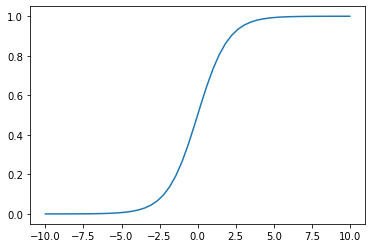

In [142]:
plt.plot(z,sigmoid(z))

In [ ]:
def linear_regression(xi):
    result = w0

    for j in range(xi):
        result = result + x[j]*w[j]

    return result

def logistic_regression(xi):
    score = w0

    for j in range(xi):
        score = score + x[j]*w[j]
        result = sigmoid(score)
    return result


## Training logistic regression with scikit learn

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [157]:
model.intercept_[0]

-0.10903415888243773

In [156]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

The 2 columns for y_pred correspond to predictions for 0, and 1. we are interested in second column that corresponds to 1

In [147]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99100284, 0.00899716],
       [0.7954763 , 0.2045237 ],
       [0.78777784, 0.21222216],
       ...,
       [0.86360575, 0.13639425],
       [0.20022505, 0.79977495],
       [0.16258923, 0.83741077]])

In [149]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00899716, 0.2045237 , 0.21222216, ..., 0.13639425, 0.79977495,
       0.83741077])

In [150]:
churn_decision = (y_pred >= 0.5)

customers who are more likely to churn

In [151]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [152]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [153]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [154]:
(y_val == churn_decision).mean()

0.8034066713981547

## Model interpretation

In [159]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [158]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Zip function joins the ith element of each list

In [162]:
a = [1,2,3,4]
b = 'abcd'

print(dict(zip(a,b)))
print(list(zip(a,b)))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}
[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


In [164]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [170]:
small = ['contract','tenure','monthlycharges']

In [172]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [173]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [174]:
dv_small  = DictVectorizer(sparse=False)

X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)


In [176]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [178]:
w0 = model_small.intercept_[0]
w0 

-2.4767756616411645

In [180]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [181]:
dict(zip(dv_small.get_feature_names(),w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

## Using the model

In [182]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [202]:
dicts_fulll_train = df_full_train[categorical+numeric].to_dict(orient='records')

In [203]:
dv_full = DictVectorizer(sparse=False)
X_train_full = dv_full.fit_transform(dicts_fulll_train)

In [204]:
y_full_train = df_full_train.churn.values

In [205]:
full_model = LogisticRegression()
full_model.fit(X_train_full,y_full_train)

LogisticRegression()

In [206]:
dicts_test = df_test[categorical+numeric].to_dict(orient='records')
X_test = dv_full.transform(dicts_test)

In [207]:
y_pred = full_model.predict_proba(X_test)[:,1]

In [208]:
churn_decision = (y_pred >= 0.5)

In [209]:
(churn_decision == y_test).mean()

0.815471965933286

In [210]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [211]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [212]:
x_small = dv.transform([customer])

In [213]:
model.predict_proba(x_small)[0,1]

0.6222118599915756

In [214]:
y_test[-1]

1

#### Confusion Table

In [217]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [218]:
t = 0.5
predict_positve = (y_pred > t)
predict_negative = (y_pred < t)

In [219]:
predict_positve

array([False, False, False, ..., False, False,  True])

In [222]:
tp = (predict_positve & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positve&actual_negative).sum()
fn = (predict_negative&actual_positive).sum()

tp, tn, fp, fn

(79, 790, 233, 307)

In [224]:
confusion_matrix = np.array([
    [tn,tp],
    [tn,tp]
])
confusion_matrix

array([[790,  79],
       [790,  79]])

#### Precison and Recall

In [225]:
precision = tp / (tp+fp)
Recall = tp / (tp+fn)
precision, Recall

(0.2532051282051282, 0.20466321243523317)

#### ROC

In [226]:
tpr = tp/(tp+fn)
tpr

0.20466321243523317

In [227]:
fpr = fp / (fp+tn)
fpr

0.22776148582600195

In [232]:
threshold = np.linspace(0,1,101)
scores = []
for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    

    
    predict_positve = (y_pred > t)
    predict_negative = (y_pred < t)

    tp = (predict_positve & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positve&actual_negative).sum()
    fn = (predict_negative&actual_positive).sum()
    
    scores.append((t,tp,fp,fn,tn))

In [233]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 361, 934, 25, 89),
 (0.02, 341, 873, 45, 150),
 (0.03, 324, 828, 62, 195),
 (0.04, 318, 799, 68, 224),
 (0.05, 306, 762, 80, 261),
 (0.06, 297, 744, 89, 279),
 (0.07, 282, 711, 104, 312),
 (0.08, 264, 680, 122, 343),
 (0.09, 253, 653, 133, 370),
 (0.1, 245, 637, 141, 386),
 (0.11, 240, 619, 146, 404),
 (0.12, 232, 600, 154, 423),
 (0.13, 223, 584, 163, 439),
 (0.14, 217, 571, 169, 452),
 (0.15, 209, 556, 177, 467),
 (0.16, 204, 546, 182, 477),
 (0.17, 198, 536, 188, 487),
 (0.18, 193, 515, 193, 508),
 (0.19, 188, 502, 198, 521),
 (0.2, 183, 482, 203, 541),
 (0.21, 182, 474, 204, 549),
 (0.22, 177, 459, 209, 564),
 (0.23, 171, 448, 215, 575),
 (0.24, 162, 439, 224, 584),
 (0.25, 156, 430, 230, 593),
 (0.26, 151, 422, 235, 601),
 (0.27, 148, 416, 238, 607),
 (0.28, 146, 406, 240, 617),
 (0.29, 142, 397, 244, 626),
 (0.3, 138, 392, 248, 631),
 (0.31, 134, 382, 252, 641),
 (0.32, 129, 378, 257, 645),
 (0.33, 127, 371, 259, 652),
 (0.34, 125, 364, 261, 659),